<a href="https://colab.research.google.com/github/YuvarajCU/Hospital-Patients-Readmission-Prediction/blob/main/Hospital_Patients_Readmission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hospital Patient Readmission Prediction
###Author - Yuvaraj C U | yuvarajcu@gmail.com
This is an assignment done as a part of selection process for the role of an intern at Umrit.fit

###Importing Libraries
Here we have imported all the required Libraries that will be used in this code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

###Data Loading



We have used a data set from the kaggle that provides the access to ten years of patient information (source):

https://www.kaggle.com/datasets/dubradave/hospital-readmissions/data

Information in the file

"age" - age bracket of the patient

"time_in_hospital" - days (from 1 to 14)

"n_procedures" - number of procedures performed during the hospital stay

"n_lab_procedures" - number of laboratory procedures performed during the hospital stay

"n_medications" - number of medications administered during the hospital stay

"n_outpatient" - number of outpatient visits in the year before a hospital stay

"n_inpatient" - number of inpatient visits in the year before the hospital stay

"n_emergency" - number of visits to the emergency room in the year before the hospital stay

"medical_specialty" - the specialty of the admitting physician

"diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)

"diag_2" - secondary diagnosis

"diag_3" - additional secondary diagnosis

"glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed

"A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed

"change" - whether there was a change in the diabetes medication ('yes' or 'no')

"diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')

"readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

In [2]:
from google.colab import drive

# Mount the drive to access your file
drive.mount('/content/drive')

# Load the dataset from your Google Drive
file_path = '/content/drive/MyDrive/Umrit Assignment/hospital_readmissions.csv'
df = pd.read_csv(file_path)

# Display first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [4]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [5]:
df.dtypes

,0
age,object
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
medical_specialty,object
diag_1,object


Here the age will be having a different data type, as it describes the age brackets and in the following codes, we will be converting them into numerical variable for our convenience

In [6]:
(df.isnull().sum()/len(df))

,0
age,0.0
time_in_hospital,0.0
n_lab_procedures,0.0
n_procedures,0.0
n_medications,0.0
n_outpatient,0.0
n_inpatient,0.0
n_emergency,0.0
medical_specialty,0.0
diag_1,0.0


It is evident that there is no need for data cleaning.

P.S. - I really wish i could show my knowledge in data cleaning 🙂

###Exploratory Data Analysis

This is an important section as this enlighten us with a variety of charts and information needed for us to understand the data better and make decisions based on the correlation and shall also provide us an insight on various other derived information which shall turn out to be informative or atleast interesting.

In [7]:
# Descriptive statistics for numerical variables
df.describe(include='all')

# Frequency tables for categorical variables
for col in df.select_dtypes(include=['object', 'category']):
  print(df[col].value_counts())

# Exploring relationships with readmission status
df.groupby('readmitted').describe()  # Descriptive stats for each readmission group

age
[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: count, dtype: int64
medical_specialty
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: count, dtype: int64
diag_1
Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: count, dtype: int64
diag_2
Other              9056
Circulatory        8134
Diabetes           2906
Respiratory        2872
Digestive           973
Injury              591
Musculoskeletal     426
Missing              42
Name: count, dtype: int64
diag_3
Other              9107
Circulatory        7686
Diabetes           4261
Respiratory        1915
Digestive           916
Injury              464

time_in_hospital                                                \
                      count      mean       std  min  25%  50%  75%   max   
readmitted                                                                  
no                  13246.0  4.331345  3.000777  1.0  2.0  4.0  6.0  14.0   
yes                 11754.0  4.590778  2.996433  1.0  2.0  4.0  6.0  14.0   

           n_lab_procedures             ... n_inpatient       n_emergency  \
                      count       mean  ...         75%   max       count   
readmitted                              ...                                 
no                  13246.0  42.625245  ...         0.0  13.0     13246.0   
yes                 11754.0  43.934405  ...         1.0  15.0     11754.0   

                                                          
                mean       std  min  25%  50%  75%   max  
readmitted                                                
no          0.108561  0.546231  0.0  0.0  0.0  0.0  37.0  
yes         0.274545  1.148212  0.0  0.0  0.0  0.0  64.0  

[2 rows x 56 columns]

Numeric feature analysis

"time_in_hospital" - days (from 1 to 14)

"n_procedures" - number of procedures performed during the hospital stay

"n_lab_procedures" - number of laboratory procedures performed during the hospital stay

"n_medications" - number of medications administered during the hospital stay

"n_outpatient" - number of outpatient visits in the year before a hospital stay

"n_inpatient" - number of inpatient visits in the year before the hospital stay

"n_emergency" - number of visits to the emergency room in the year before the hospital stay

"medical_specialty" - the specialty of the admitting physician

In [8]:
#filtering the numerical variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


<Figure size 640x480 with 0 Axes>

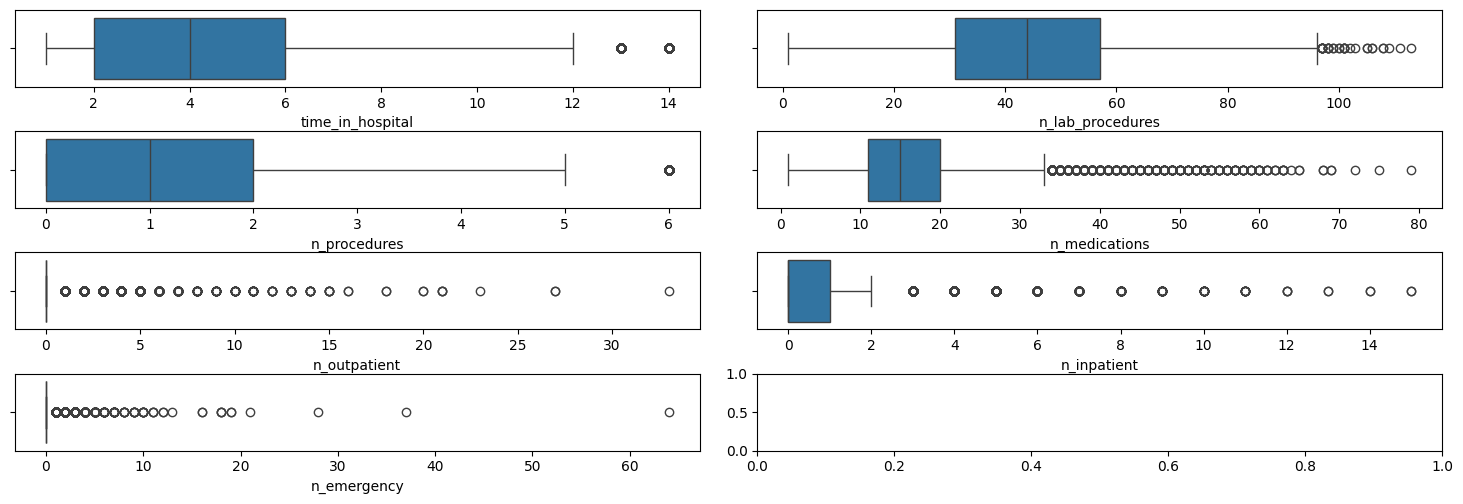

In [9]:
# plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.3, wspace = 0.7)
fig, axs = plt.subplots(4, 2, figsize=(15, 5))
fig.tight_layout()

# ax = plt.subplot(0, 0, 4)

# filter df and plot ticker on the new subplot axis
sns.boxplot(data = df, x = 'time_in_hospital', ax = axs[0, 0])
sns.boxplot(data = df, x = 'n_lab_procedures', ax = axs[0, 1])
sns.boxplot(data = df, x = 'n_procedures', ax = axs[1, 0])
sns.boxplot(data = df, x = 'n_medications', ax = axs[1, 1])
sns.boxplot(data = df, x = 'n_outpatient', ax = axs[2, 0])
sns.boxplot(data = df, x = 'n_inpatient', ax = axs[2, 1])
sns.boxplot(data = df, x = 'n_emergency', ax = axs[3, 0])

# fig.subplots_adjust(wspace=0.5)
plt.show()

<Axes: >

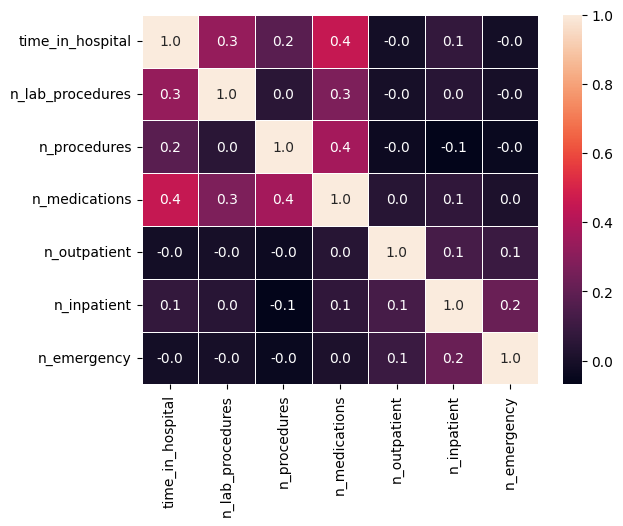

In [10]:
sns.heatmap(numeric_df.corr(), annot=True, linewidth=.5, fmt=".1f")

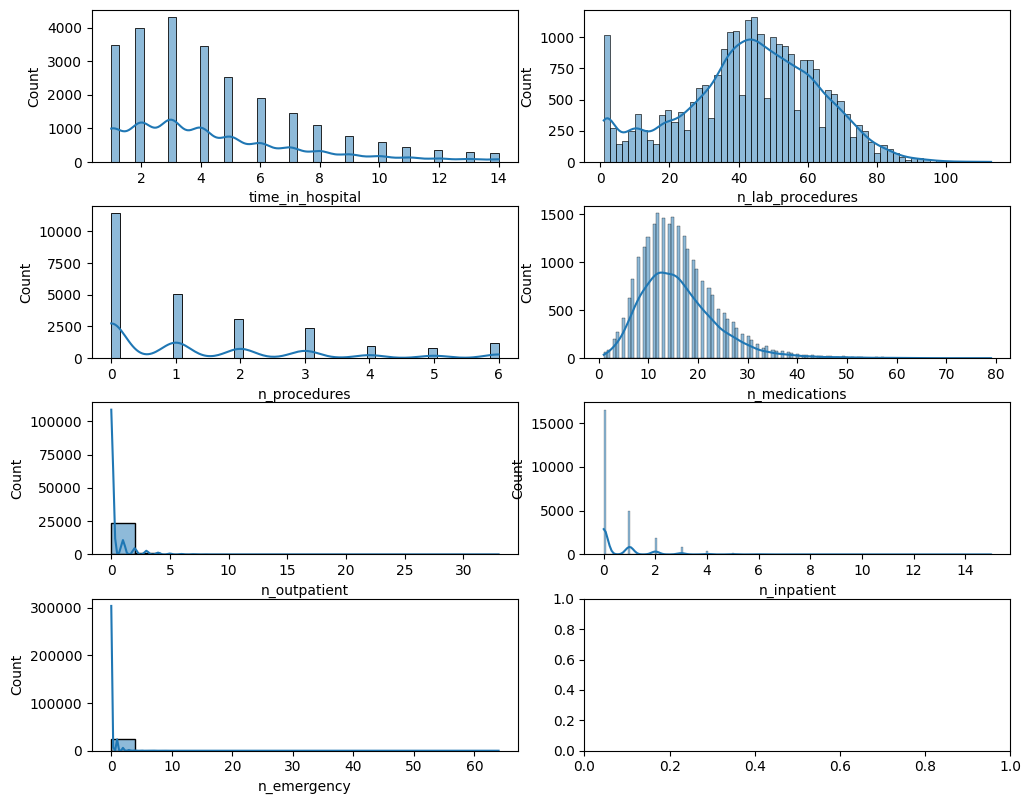

In [11]:
# sns.histplot(df['time_in_hospital'], kde=True)
fig, axs = plt.subplots(4, 2, figsize=(10, 8))
fig.tight_layout()

sns.histplot(data = df, x = 'time_in_hospital', ax = axs[0, 0], kde = True)
sns.histplot(data = df, x = 'n_lab_procedures', ax = axs[0, 1], kde = True)
sns.histplot(data = df, x = 'n_procedures', ax = axs[1, 0], kde = True)
sns.histplot(data = df, x = 'n_medications', ax = axs[1, 1], kde = True)
sns.histplot(data = df, x = 'n_outpatient', ax = axs[2, 0], kde = True)
sns.histplot(data = df, x = 'n_inpatient', ax = axs[2, 1], kde = True)
sns.histplot(data = df, x = 'n_emergency', ax = axs[3, 0], kde = True)

plt.show()

Categorical Analysis

"age" - age bracket of the patient

"medical_specialty" - the specialty of the admitting physician

"diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)

"diag_2" - secondary diagnosis

"diag_3" - additional secondary diagnosis

"glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed

"A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed

"change" - whether there was a change in the diabetes medication ('yes' or 'no')

"diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')

"readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

<Axes: xlabel='count', ylabel='readmitted'>

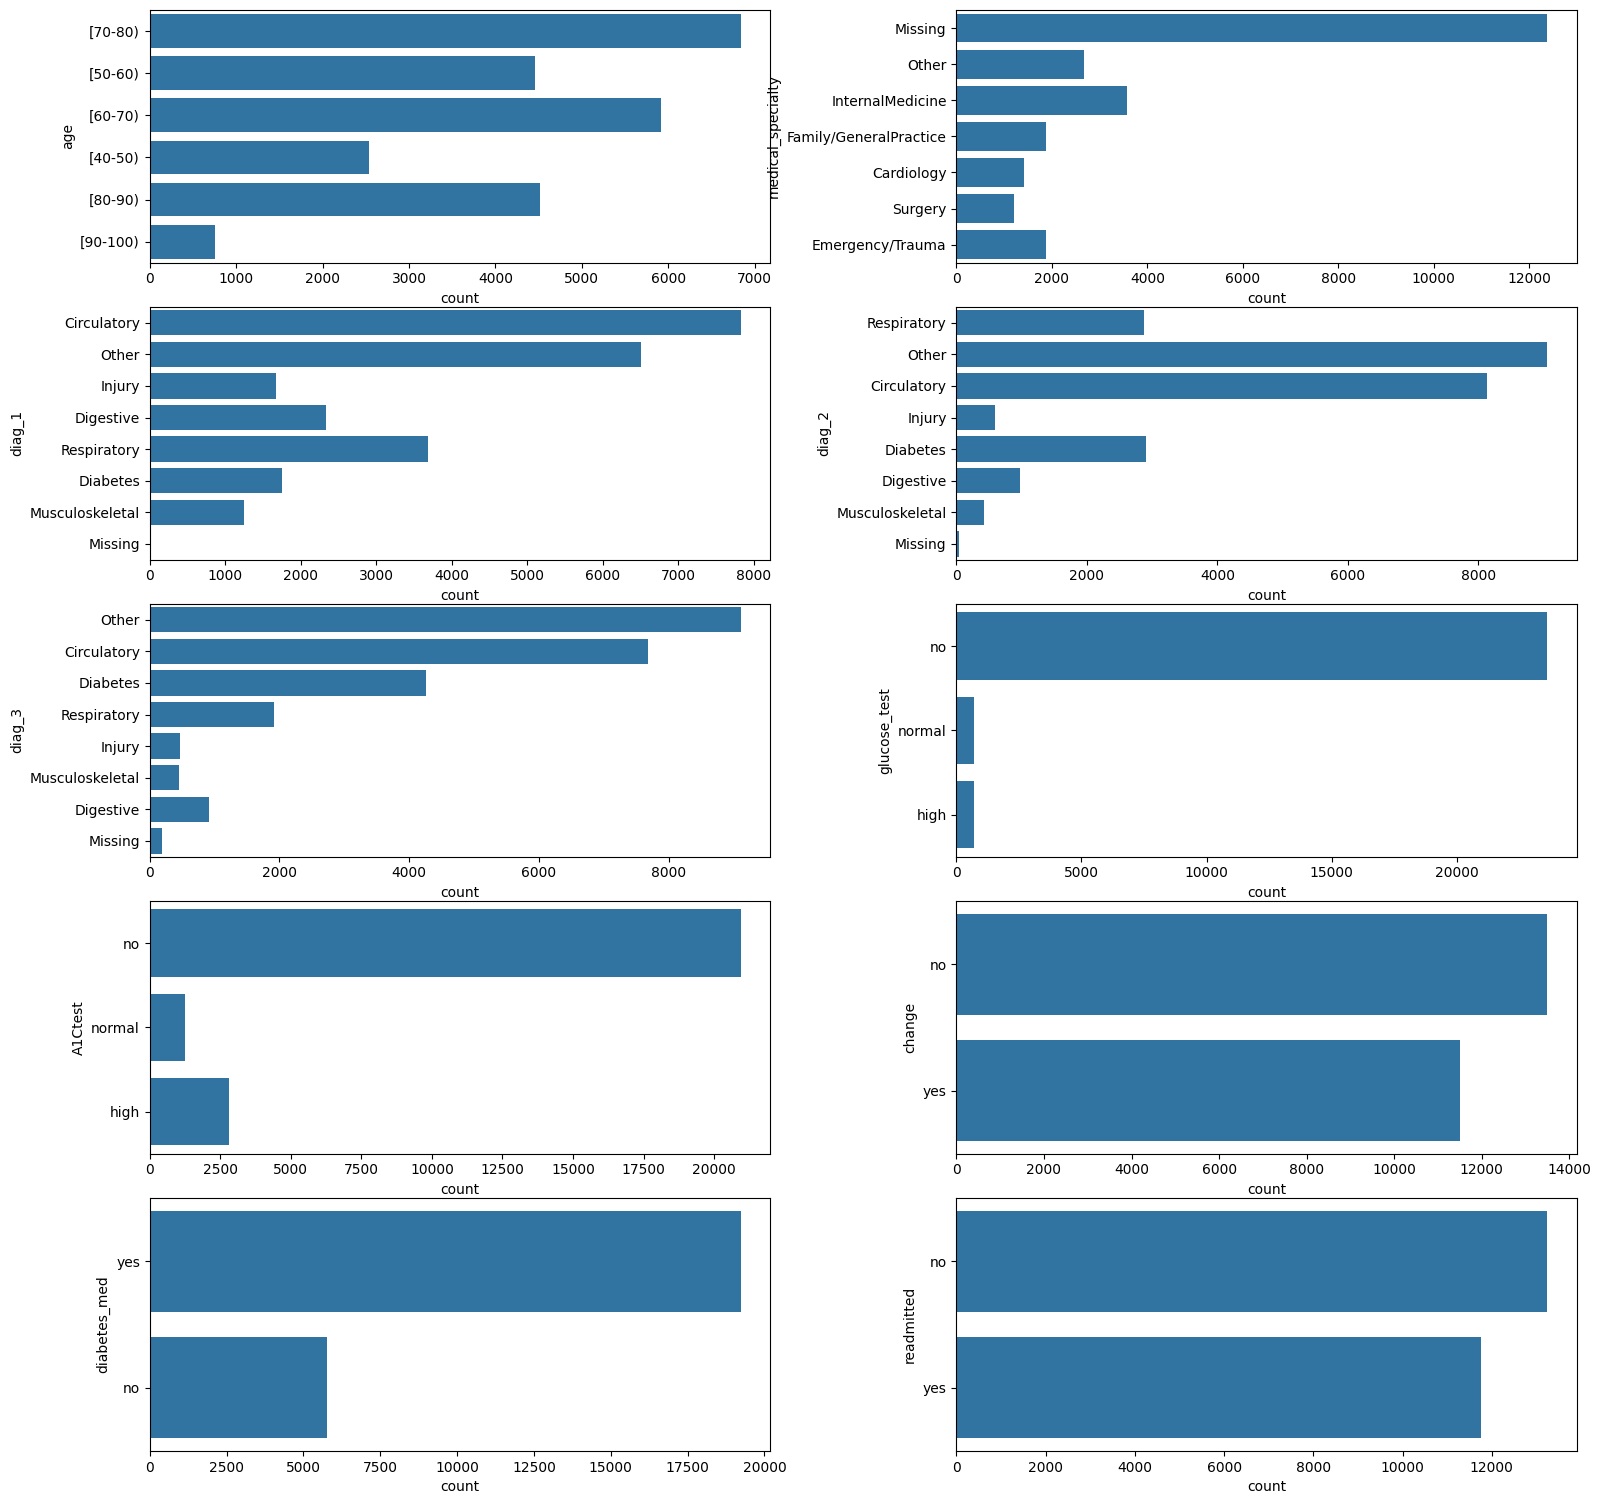

In [12]:
cat_features = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', \
                'A1Ctest', 'change', 'diabetes_med', 'readmitted']

fig, axs = plt.subplots(5, 2, figsize=(15, 15))
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

sns.countplot(data = df, y = 'age', ax = axs[0, 0])
sns.countplot(data = df, y = 'medical_specialty', ax = axs[0, 1])
sns.countplot(data = df, y = 'diag_1', ax = axs[1, 0])
sns.countplot(data = df, y = 'diag_2', ax = axs[1, 1])
sns.countplot(data = df, y = 'diag_3', ax = axs[2, 0])
sns.countplot(data = df, y = 'glucose_test', ax = axs[2, 1])
sns.countplot(data = df, y = 'A1Ctest', ax = axs[3, 0])
sns.countplot(data = df, y = 'change', ax = axs[3, 1])
sns.countplot(data = df, y = 'diabetes_med', ax = axs[4, 0])
sns.countplot(data = df, y = 'readmitted', ax = axs[4, 1])

         age       diag_1  count
5    [40-50)        Other    750
7    [50-60)  Circulatory   1256
14   [60-70)  Circulatory   1962
22   [70-80)  Circulatory   2392
30   [80-90)  Circulatory   1482
38  [90-100)  Circulatory    228


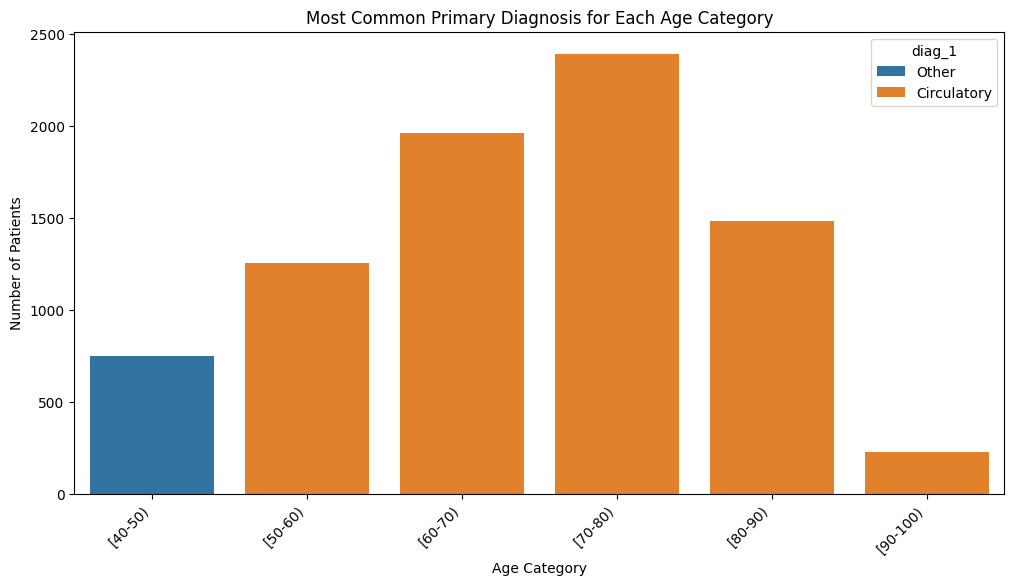

In [13]:
# Group by age and diag_1, then count occurrences
diagnosis_by_age = df.groupby(['age', 'diag_1'])['diag_1'].count().reset_index(name='count')

# Find the most common diagnosis for each age group
most_common_diagnosis = diagnosis_by_age.loc[diagnosis_by_age.groupby('age')['count'].idxmax()]

print(most_common_diagnosis)

# You can also visualize this with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', hue='diag_1', data=most_common_diagnosis)
plt.title('Most Common Primary Diagnosis for Each Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.show()

This gives us the following insights :

The most common primary diagnosis can be found is Circulatory disease,for all age groups, except for age group [40-5).

The most common diagnosis for age group [40-5) is 'Other'.


         age       diag_2  count
6    [40-50)        Other   1097
14   [50-60)        Other   1587
22   [60-70)        Other   2036
24   [70-80)  Circulatory   2483
38   [80-90)        Other   1691
45  [90-100)        Other    306


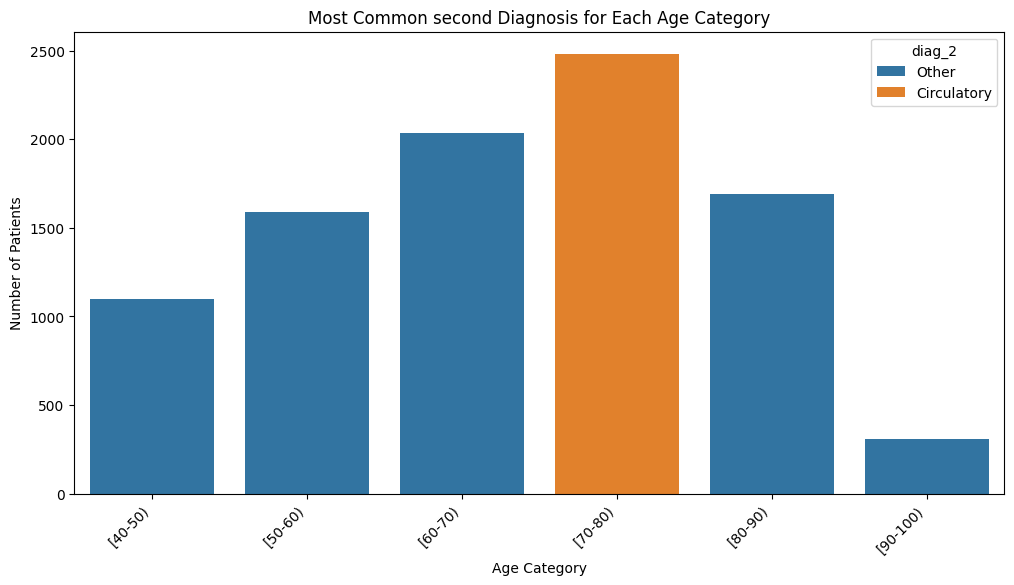

In [14]:
# Group by age and diag_1, then count occurrences
diagnosis_by_age = df.groupby(['age', 'diag_2'])['diag_2'].count().reset_index(name='count')

# Find the most common diagnosis for each age group
most_common_diagnosis = diagnosis_by_age.loc[diagnosis_by_age.groupby('age')['count'].idxmax()]

print(most_common_diagnosis)

# You can also visualize this with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', hue='diag_2', data=most_common_diagnosis)
plt.title('Most Common second Diagnosis for Each Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.show()


This gives us the following insights :

The most common secondary diagnosis can be found is Circulatory disease,for age group [70-80).

The most common diagnosis for all age group except the age group[70-80) is 'Other'.


         age diag_3  count
6    [40-50)  Other   1084
14   [50-60)  Other   1635
22   [60-70)  Other   2068
30   [70-80)  Other   2383
38   [80-90)  Other   1645
46  [90-100)  Other    292


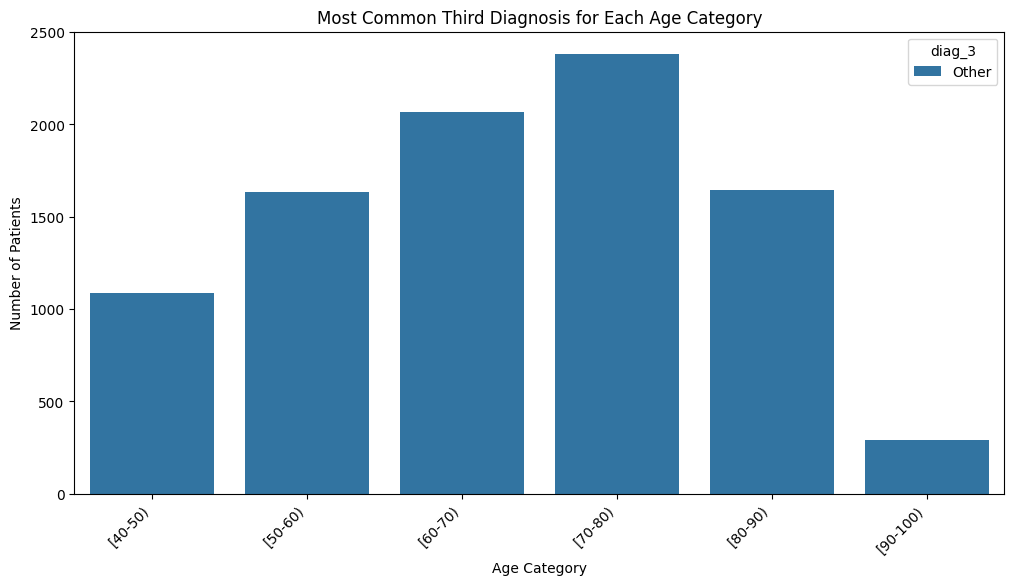

In [15]:
# Group by age and diag_3, then count occurrences
diagnosis_by_age = df.groupby(['age', 'diag_3'])['diag_3'].count().reset_index(name='count')

# Find the most common diagnosis for each age group
most_common_diagnosis = diagnosis_by_age.loc[diagnosis_by_age.groupby('age')['count'].idxmax()]

print(most_common_diagnosis)

# You can also visualize this with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', hue='diag_3', data=most_common_diagnosis)
plt.title('Most Common Third Diagnosis for Each Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.show()


This gives us the following insights :

The most common tertiary diagnosis is 'Other', with the highest prevalence in age group [70-80).


Relationship between categorical variable and target variable

<Axes: xlabel='count', ylabel='diabetes_med'>

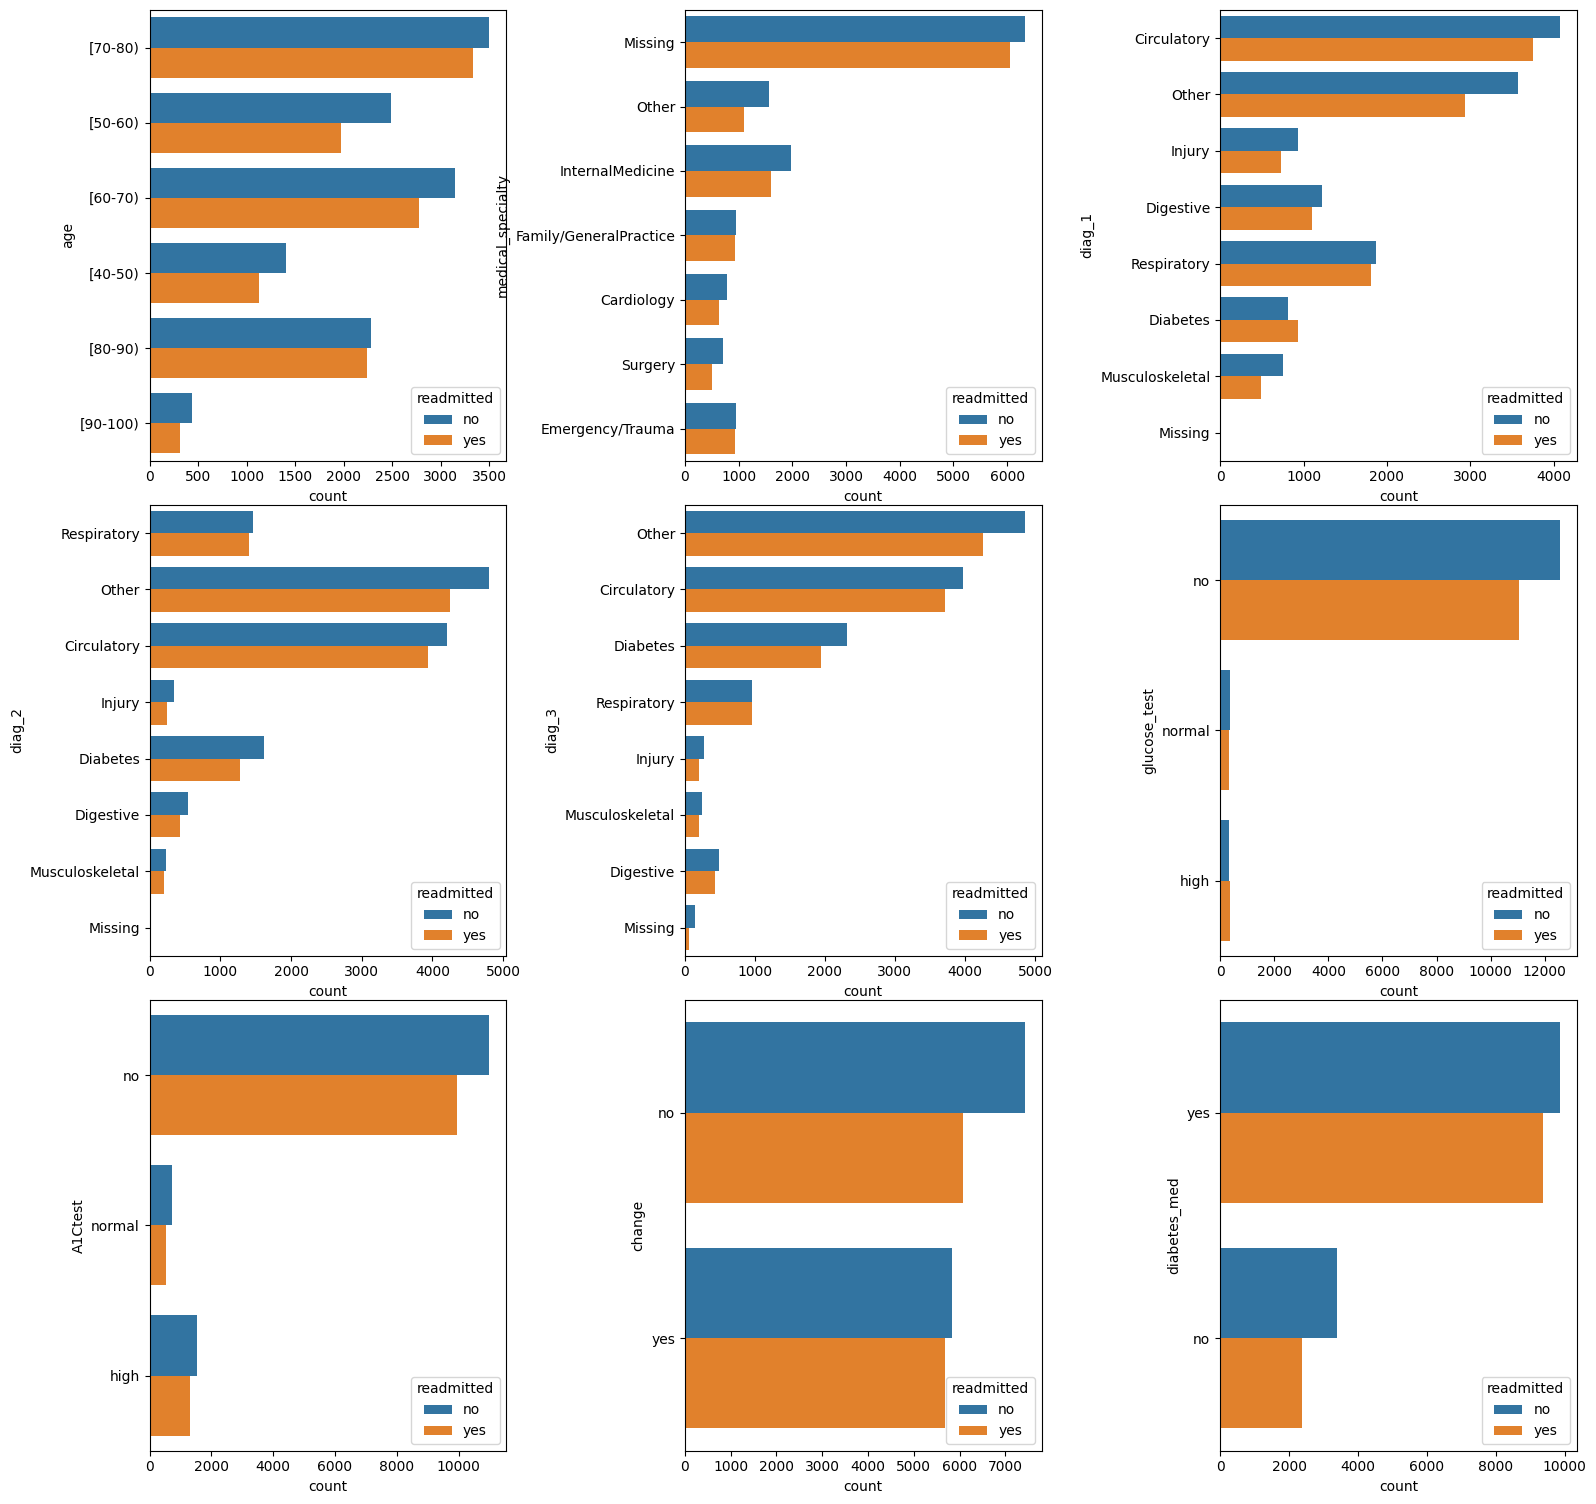

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout()
plt.subplots_adjust(wspace=0.5)

sns.countplot(data = df, y = 'age', hue = 'readmitted', ax = axs[0, 0])
sns.countplot(data = df, y = 'medical_specialty', hue = 'readmitted',ax = axs[0, 1])
# axs[0, 1].tick_params(rotation= 15)
sns.countplot(data = df, y = 'diag_1', hue = 'readmitted',ax = axs[0, 2])
sns.countplot(data = df, y = 'diag_2', hue = 'readmitted',ax = axs[1, 0])
sns.countplot(data = df, y = 'diag_3', hue = 'readmitted',ax = axs[1, 1])
sns.countplot(data = df, y = 'glucose_test', hue = 'readmitted',ax = axs[1, 2])
sns.countplot(data = df, y = 'A1Ctest', hue = 'readmitted',ax = axs[2, 0])
sns.countplot(data = df, y = 'change', hue = 'readmitted',ax = axs[2, 1])
sns.countplot(data = df, y = 'diabetes_med', hue = 'readmitted',ax = axs[2, 2])
# sns.countplot(data = df, y = 'readmitted', ax = axs[4, 1])

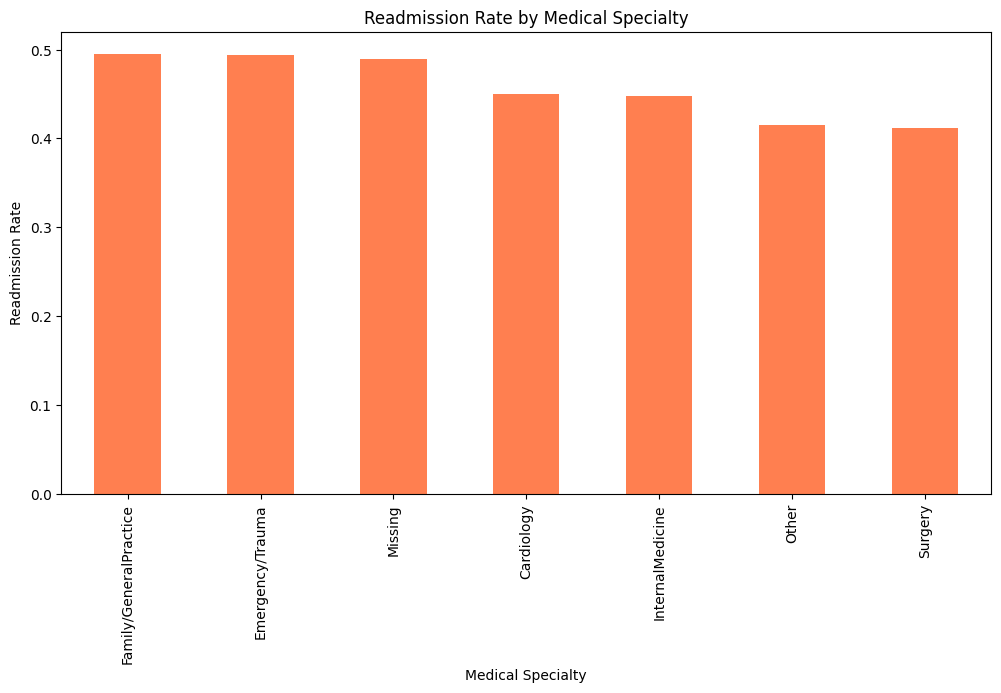

In [17]:
#Plotting Readmission Rate by Medical Specialty
df['readmitted'] = df['readmitted'].map({'yes': 1, 'no': 0})

readmission_by_specialty = df.groupby('medical_specialty')['readmitted'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
readmission_by_specialty.plot(kind='bar', color='coral')
plt.title('Readmission Rate by Medical Specialty')
plt.xlabel('Medical Specialty')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=90)
plt.show()

This one gives an idea on the different medical specialty and its contribution to readmission rate

In [18]:
# Group by 'readmitted' and calculate the mean of 'number_inpatient', 'number_outpatient', 'number_emergency'
visit_stats = df.groupby('readmitted')[['n_inpatient', 'n_outpatient', 'n_emergency']].mean()

# Create a bar plot using Plotly Express
fig = px.bar(visit_stats, barmode='group',
             title='Average Inpatient, Outpatient, and Emergency Visits by Readmission Status')
fig.update_layout(xaxis_title='Readmitted', yaxis_title='Average Number of Visits')
fig.show()


This is another interesting chart to show the contribution of the number of inpatients, outpatients and emergency cases towards the readmission rate

This plot can help identify potential patterns and relationships between readmission status and healthcare resource utilization. For example, you might see:

Higher average inpatient visits for readmitted patients, suggesting a more complex or severe condition requiring hospitalization.

Relatively lesser outpatient visits for both groups, indicating baseline healthcare needs might be lesser yet comparable.

Increased emergency visits for readmitted patients, possibly due to complications requiring immediate attention.

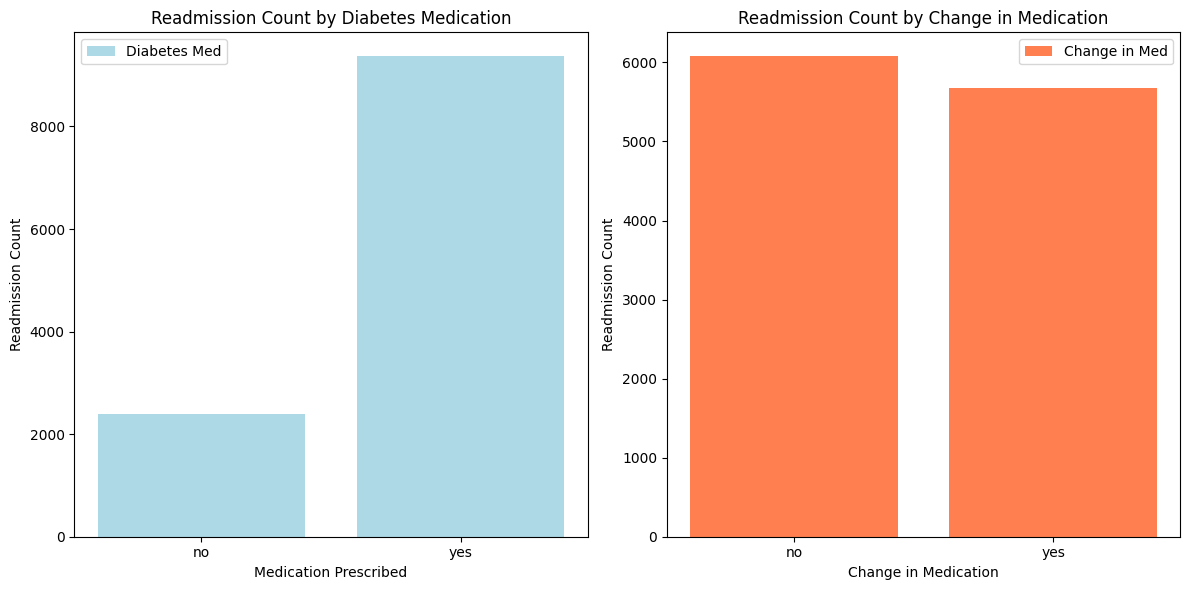

Percentage change in readmission rate after medication change: -6.58%


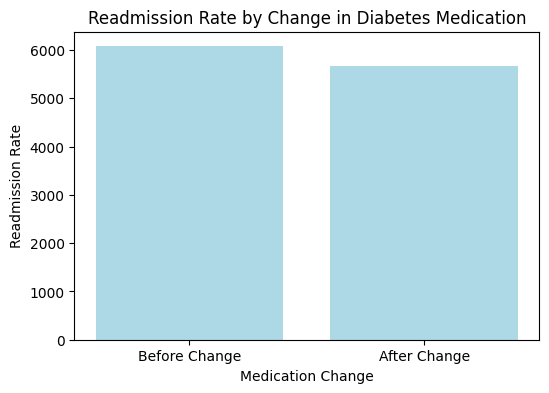

In [19]:
# Group and calculate readmission counts
readmission_by_med = df.groupby('diabetes_med')['readmitted'].sum()
readmission_by_change = df.groupby('change')['readmitted'].sum()

# Create a single figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot readmission count by medication
ax1.bar(readmission_by_med.index, readmission_by_med.values, color='lightblue', label='Diabetes Med')
ax1.set_title('Readmission Count by Diabetes Medication')
ax1.set_xlabel('Medication Prescribed')
ax1.set_ylabel('Readmission Count')
ax1.legend()

# Plot readmission count by medication change
ax2.bar(readmission_by_change.index, readmission_by_change.values, color='coral', label='Change in Med')
ax2.set_title('Readmission Count by Change in Medication')
ax2.set_xlabel('Change in Medication')
ax2.set_ylabel('Readmission Count')
ax2.legend()

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

# Calculate readmission rates for each category
readmission_rate_med_prescribed = readmission_by_med['yes']
readmission_rate_med_not_prescribed = readmission_by_med['no']
readmission_rate_change_yes = readmission_by_change['yes']
readmission_rate_change_no = readmission_by_change['no']

# Calculate percentage change
percentage_change = ((readmission_rate_change_yes - readmission_rate_change_no) / readmission_rate_change_no) * 100

# Print the percentage change
print(f"Percentage change in readmission rate after medication change: {percentage_change:.2f}%")

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Before Change', 'After Change'], [readmission_rate_change_no, readmission_rate_change_yes], color='lightblue')
plt.title('Readmission Rate by Change in Diabetes Medication')
plt.xlabel('Medication Change')
plt.ylabel('Readmission Rate')
plt.show()

These charts draws attention to the corelation between readmission and the medication prescribed and change in medication for diabetics

The 3rd plot shows a slightly lower readmission rate for "After Change" and the percentage change is negative, it aligns with an a slightly decreased readmission risk after medication changes.

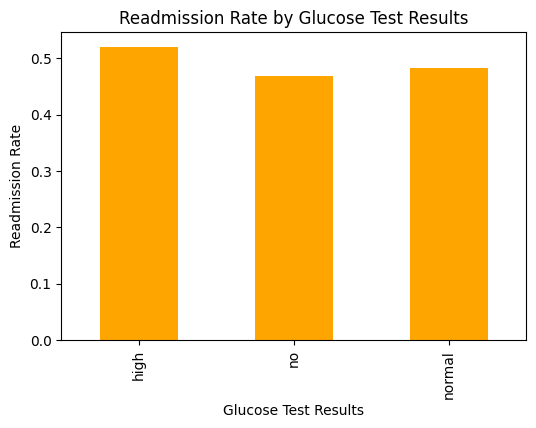

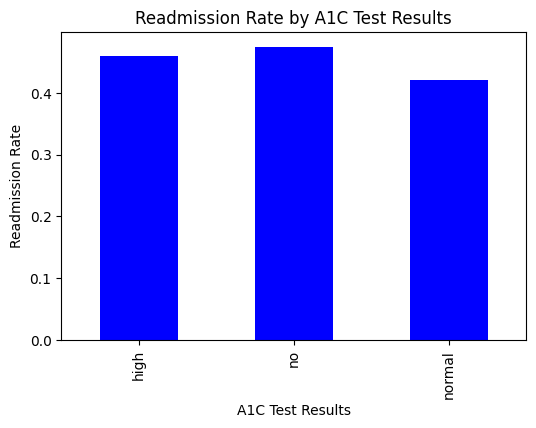

In [20]:
# Plotting glucose test vs readmission
glucose_test_vs_readmission = df.groupby('glucose_test')['readmitted'].mean()

plt.figure(figsize=(6, 4))
glucose_test_vs_readmission.plot(kind='bar', color='orange')
plt.title('Readmission Rate by Glucose Test Results')
plt.xlabel('Glucose Test Results')
plt.ylabel('Readmission Rate')
plt.show()

# Plotting A1C test vs readmission
A1C_test_vs_readmission = df.groupby('A1Ctest')['readmitted'].mean()

plt.figure(figsize=(6, 4))
A1C_test_vs_readmission.plot(kind='bar', color='blue')
plt.title('Readmission Rate by A1C Test Results')
plt.xlabel('A1C Test Results')
plt.ylabel('Readmission Rate')
plt.show()


Readmission Rate by Glucose Test Results: This plot shows the average readmission rate for patients categorized by their glucose test results. Higher bar of High glucose indicate a higher risk of readmission for patients with high glucose test results compared to other two

Readmission Rate by A1C Test Results: Similar to the previous plot, this one shows the average readmission rate for patients categorized by their A1C test results (another diabetes indicator). Here its the patients with no tests performed had slightly higher changes of readmission.

But, as the number of patients who had not taken the tests is so high against the number of patients who had tested, the reliability on this data is going to relatively least and also emphises the need to mandate these tests for better prediction. Yet despite this fact, patients with high level in both cases turns out to be having a higher chance of readmission

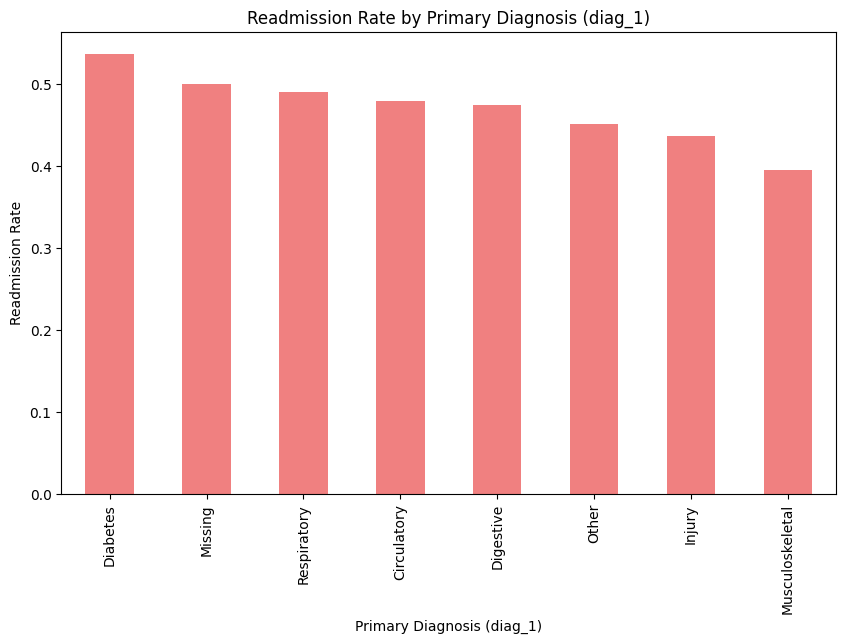

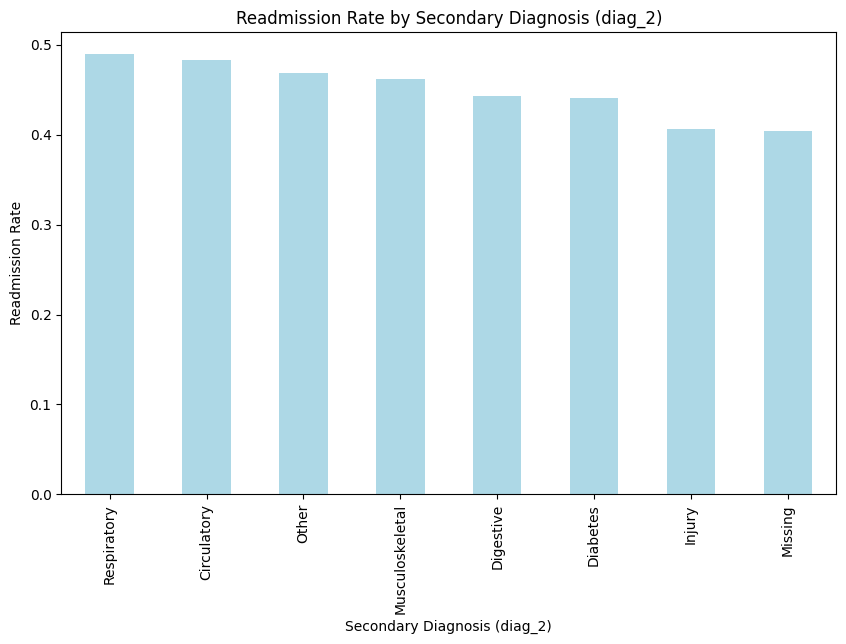

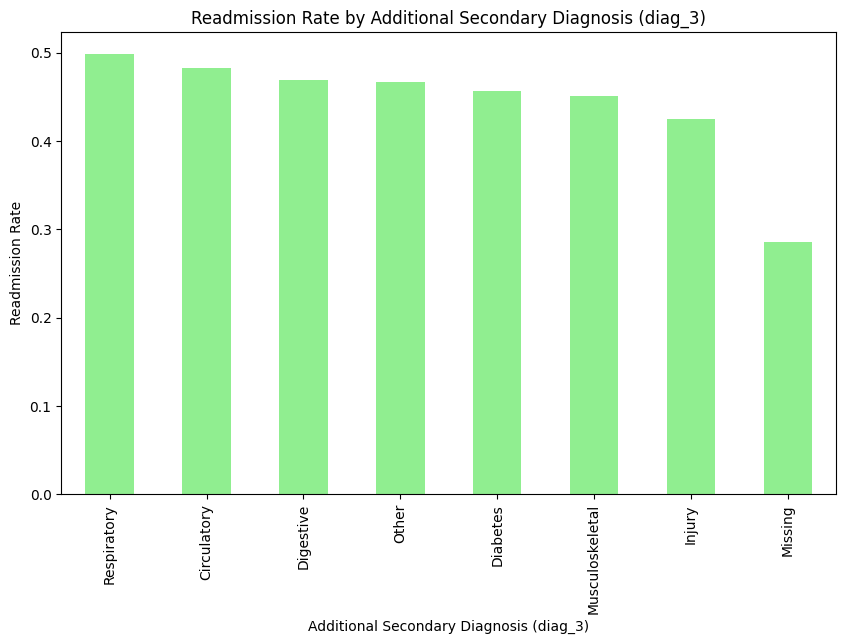

In [21]:
# Function to plot readmission rate by diagnosis
def plot_readmission_by_diagnosis(diag_col, color, title):
    diag_vs_readmission = df.groupby(diag_col)['readmitted'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    diag_vs_readmission.plot(kind='bar', color=color)
    plt.title(f'Readmission Rate by {title}')
    plt.xlabel(f'{title}')
    plt.ylabel('Readmission Rate')
    plt.xticks(rotation=90)
    plt.show()

# Plotting for diag_1, diag_2, diag_3
plot_readmission_by_diagnosis('diag_1', 'lightcoral', 'Primary Diagnosis (diag_1)')
plot_readmission_by_diagnosis('diag_2', 'lightblue', 'Secondary Diagnosis (diag_2)')
plot_readmission_by_diagnosis('diag_3', 'lightgreen', 'Additional Secondary Diagnosis (diag_3)')

This is another set of interesting charts, showing the contribution of different diagnoses at different stages to the readmission rates

In [22]:
# Combine diag_1, diag_2, and diag_3 into a single column
df['combined_diagnosis'] = df['diag_1'].astype(str) + '_' + df['diag_2'].astype(str) + '_' + df['diag_3'].astype(str)

# Group by 'combined_diagnosis' and calculate the mean readmission rate
diagnosis_readmission_rate = df.groupby('combined_diagnosis')['readmitted'].mean().sort_values(ascending=False)

# Get the top 20 combined diagnoses with the highest readmission rates
top_20_diagnoses = diagnosis_readmission_rate.head(20)

print("Top 20 Combined Diagnoses Based on Readmission Rate:")
print(top_20_diagnoses)


Top 20 Combined Diagnoses Based on Readmission Rate:
combined_diagnosis
Diabetes_Respiratory_Missing               1.0
Diabetes_Injury_Musculoskeletal            1.0
Other_Digestive_Missing                    1.0
Respiratory_Missing_Diabetes               1.0
Digestive_Missing_Other                    1.0
Diabetes_Injury_Missing                    1.0
Musculoskeletal_Musculoskeletal_Injury     1.0
Respiratory_Injury_Diabetes                1.0
Musculoskeletal_Musculoskeletal_Missing    1.0
Missing_Other_Diabetes                     1.0
Diabetes_Digestive_Injury                  1.0
Diabetes_Diabetes_Musculoskeletal          1.0
Diabetes_Diabetes_Digestive                1.0
Diabetes_Diabetes_Diabetes                 1.0
Digestive_Musculoskeletal_Respiratory      1.0
Circulatory_Respiratory_Missing            1.0
Respiratory_Circulatory_Injury             1.0
Respiratory_Musculoskeletal_Digestive      1.0
Other_Missing_Diabetes                     1.0
Missing_Diabetes_Circulatory       

By examining the top 20 combined diagnoses, you can identify the specific combinations of primary, secondary and additional diagnoses that are most strongly associated with readmissions.

This information can be valuable for healthcare providers in identifying patients at higher risk of readmission and implementing targeted interventions.

### Data Pre-processing

In [23]:
# Assign numerical values to each age bracket (ordinal encoding)
age_mapping = {
    '[0-10)': 1,
    '[10-20)': 2,
    '[20-30)': 3,
    '[30-40)': 4,
    '[40-50)': 5,
    '[50-60)': 6,
    '[60-70)': 7,
    '[70-80)': 8,
    '[80-90)': 9,
    '[90-100)': 10
}

df['age'] = df['age'].map(age_mapping)

# Verify the transformation
print(df['age'].head())


0    8
1    8
2    6
3    8
4    7
Name: age, dtype: int64


In [24]:
df['change'] = df['change'].replace({'yes': 1, 'no': 0})
df['diabetes_med'] = df['diabetes_med'].replace({'yes': 1, 'no': 0})
#df['readmitted'] = df['readmitted'].replace({'yes': 1, 'no': 0}), this is alreaady done in plotting one of the above graphs
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,combined_diagnosis
0,8,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0,Circulatory_Respiratory_Other
1,8,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0,Other_Other_Other
2,6,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1,Circulatory_Circulatory_Circulatory
3,8,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,1,Circulatory_Other_Diabetes
4,7,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,0,1,0,Other_Circulatory_Respiratory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,9,14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,0,0,1,Circulatory_Other_Circulatory
24996,9,2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,1,1,1,Digestive_Injury_Other
24997,8,5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,0,0,1,Other_Other_Other
24998,8,2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,1,1,0,Respiratory_Diabetes_Other


In [25]:
# Create a LabelEncoder object
le = LabelEncoder()

# Label encode the specified categorical variables
for col in ['medical_specialty', 'diag_1', 'diag_2', 'diag_3',
            'glucose_test', 'A1Ctest']:
    df[col] = le.fit_transform(df[col])


In [26]:
#df['readmitted'] = df['readmitted'].astype(int)

In [27]:
X = df.drop(['readmitted', 'combined_diagnosis'], axis=1)  # Features
y = df['readmitted']  # Target variable

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Model 1 - Logistic Regression

In [29]:
# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.6073
Precision: 0.6224
Recall: 0.4031
F1-score: 0.4893
              precision    recall  f1-score   support

           0       0.60      0.79      0.68      4000
           1       0.62      0.40      0.49      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.59      0.59      7500
weighted avg       0.61      0.61      0.59      7500



####Model 1 A - Scaled Model

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline to scale features and fit Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_scaled = pipeline.predict(X_test)

# Evaluate the scaled model
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

print(f'Scaled Accuracy: {accuracy_scaled}')
print(f'Scaled Precision: {precision_scaled}')
print(f'Scaled Recall: {recall_scaled}')
print(f'Scaled F1 Score: {f1_scaled}')

# Generate the classification report
report = classification_report(y_test, y_pred_scaled)
print(report)


Scaled Accuracy: 0.6073333333333333
Scaled Precision: 0.6224084693427437
Scaled Recall: 0.40314285714285714
Scaled F1 Score: 0.4893358765389284
              precision    recall  f1-score   support

           0       0.60      0.79      0.68      4000
           1       0.62      0.40      0.49      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.59      0.59      7500
weighted avg       0.61      0.61      0.59      7500



#### Model 1 B - Hyperparameter tuning

In [32]:
# Define hyperparameters to search
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logreg__solver': ['liblinear', 'lbfgs', 'saga']  # Different solvers for Logistic Regression
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Make predictions using the best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f'Tuned Accuracy: {accuracy_best}')
print(f'Tuned Precision: {precision_best}')
print(f'Tuned Recall: {recall_best}')
print(f'Tuned F1 Score: {f1_best}')

# Generate the classification report
report = classification_report(y_test, y_pred_best)
print(report)


Best parameters: {'logreg__C': 0.01, 'logreg__solver': 'liblinear'}
Best cross-validation accuracy: 0.6076571428571429
Tuned Accuracy: 0.6077333333333333
Tuned Precision: 0.6234513274336283
Tuned Recall: 0.4025714285714286
Tuned F1 Score: 0.4892361111111111
              precision    recall  f1-score   support

           0       0.60      0.79      0.68      4000
           1       0.62      0.40      0.49      3500

    accuracy                           0.61      7500
   macro avg       0.61      0.59      0.59      7500
weighted avg       0.61      0.61      0.59      7500



###Model 2 - Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target (y)
X = df.drop(['readmitted','combined_diagnosis'], axis=1)
y = df['readmitted']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Random Forest F1 Score: {f1_rf}')

# Generate the classification report
report = classification_report(y_test, y_pred_rf)
print(report)

Random Forest Accuracy: 0.6069333333333333
Random Forest Precision: 0.5902550686723349
Random Forest Recall: 0.5157142857142857
Random Forest F1 Score: 0.5504727050930162
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      4000
           1       0.59      0.52      0.55      3500

    accuracy                           0.61      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.61      0.61      0.60      7500



###**Theoretical task:**


Convert the Logistic Regression mathematical formula into code (in Python) and explain how each term of the formula maps to your implementation.

**Logistic Regression Formula:**

The logistic regression model is based on the log-odds or linear combination of input features, which is then passed through the sigmoid function to map the result to a probability between 0 and 1.

The equation for Logistic Regression is:


𝑦^=1/(1+𝑒−(𝑏_0 + (𝑏_1)(𝑥_1) + (𝑏_2)(𝑥_2) + ⋯ + (b_ 𝑛)(𝑥_𝑛))


Where:

𝑦^ is the predicted probability of the target variable being 1 (positive class).

𝑏_0 is the intercept (bias term).

𝑏_1,𝑏_2, … , 𝑏_𝑛 are the coefficients for the features

𝑥_1, 𝑥_2, … ,𝑥_𝑛 are the input features.



In [34]:
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Linear combination (log-odds calculation)
z = np.dot(X_train, model.coef_.T) + model.intercept_

# Apply sigmoid function to get probabilities
probabilities = sigmoid(z)

# Classify based on the threshold (0.5)
y_pred = np.where(probabilities >= 0.5, 1, 0)

How Each Term Maps to the Code:

Linear Combination (log-odds):

𝑧 = 𝑏_0 + (𝑏_1)(𝑥_1) + ⋯ + (𝑏_𝑛)(𝑥_𝑛) is calculated using `np.dot(X_train, model.coef_.T) + model.intercept_.`

Sigmoid Function:

The sigmoid function 𝜎(𝑧) = 1/(1+ (𝑒−𝑧)) is implemented as sigmoid(z) to map log-odds to a probability between 0 and 1.

Predicted Class:

The decision boundary of 0.5 is applied to classify the predicted probabilities into binary outcomes using np.where(probabilities >= 0.5, 1, 0).

This is how the Logistic Regression formula is mapped to Python code in a simple, step-by-step manner!

In [35]:
!pip install gradio


In [37]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you already have your data split into X_train, X_test, y_train, y_test

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model to a file
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [40]:
import numpy as np
import gradio as gr
import pickle

# Load the trained model
with open('logistic_model.pkl', 'rb') as f:
    model = pickle.load(f)

def predict_readmission(age, time_in_hospital, n_procedures, n_lab_procedures, n_medications, n_outpatient, n_inpatient, n_emergency):
    # Prepare the features for prediction
    features = np.array([[age, time_in_hospital, n_procedures, n_lab_procedures, n_medications, n_outpatient, n_inpatient, n_emergency]])
    prediction = model.predict(features)
    return "Readmitted" if prediction[0] == 1 else "Not Readmitted"

# Create the Gradio interface with updated input method
iface = gr.Interface(
    fn=predict_readmission,
    inputs=[
        gr.Dropdown(choices=["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)", "[50-60)", "[60-70)", "[70-80)", "[80-90)", "[90-100)"], label="Age"),
        gr.Slider(minimum=1, maximum=14, value=5, label="Time in Hospital (days)"),  # Changed `default` to `value`
        gr.Slider(minimum=0, maximum=10, value=1, label="Number of Procedures"),  # Changed `default` to `value`
        gr.Slider(minimum=0, maximum=20, value=10, label="Number of Lab Procedures"),  # Changed `default` to `value`
        gr.Slider(minimum=0, maximum=10, value=4, label="Number of Medications"),  # Changed `default` to `value`
        gr.Slider(minimum=0, maximum=10, value=1, label="Number of Outpatient Visits"),  # Changed `default` to `value`
        gr.Slider(minimum=0, maximum=10, value=0, label="Number of Inpatient Visits"),  # Changed `default` to `value`
        gr.Slider(minimum=0, maximum=10, value=1, label="Number of Emergency Visits"),  # Changed `default` to `value`
    ],
    outputs="text",
    title="Hospital Readmission Predictor",
    description="Input patient details to predict hospital readmission within 30 days."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f3cc543e1e9c0126d9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [41]:
import numpy as np
import gradio as gr
import pickle

# Load the trained model
with open('logistic_model.pkl', 'rb') as f:
    model = pickle.load(f)

def predict_readmission(age, time_in_hospital, n_procedures, n_lab_procedures, n_medications, n_outpatient, n_inpatient, n_emergency):
    # Convert age brackets to numerical values (you can adjust this based on your encoding)
    age_map = {
        "[0-10)": 5,
        "[10-20)": 15,
        "[20-30)": 25,
        "[30-40)": 35,
        "[40-50)": 45,
        "[50-60)": 55,
        "[60-70)": 65,
        "[70-80)": 75,
        "[80-90)": 85,
        "[90-100)": 95
    }

    # Prepare the features for prediction, converting categorical 'age' to its mapped value
    age_numeric = age_map[age]  # Use the mapping for the age bracket
    features = np.array([[age_numeric, time_in_hospital, n_procedures, n_lab_procedures, n_medications, n_outpatient, n_inpatient, n_emergency]])

    # Make the prediction
    prediction = model.predict(features)

    return "Readmitted" if prediction[0] == 1 else "Not Readmitted"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_readmission,
    inputs=[
        gr.Dropdown(choices=["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)", "[50-60)", "[60-70)", "[70-80)", "[80-90)", "[90-100)"], label="Age"),
        gr.Slider(minimum=1, maximum=14, value=5, label="Time in Hospital (days)"),
        gr.Slider(minimum=0, maximum=10, value=1, label="Number of Procedures"),
        gr.Slider(minimum=0, maximum=20, value=10, label="Number of Lab Procedures"),
        gr.Slider(minimum=0, maximum=10, value=4, label="Number of Medications"),
        gr.Slider(minimum=0, maximum=10, value=1, label="Number of Outpatient Visits"),
        gr.Slider(minimum=0, maximum=10, value=0, label="Number of Inpatient Visits"),
        gr.Slider(minimum=0, maximum=10, value=1, label="Number of Emergency Visits"),
    ],
    outputs="text",
    title="Hospital Readmission Predictor",
    description="Input patient details to predict hospital readmission within 30 days."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2a567f6481decac74e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
